# Consumer Behavior

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics

In [46]:
#dataset: https://www.kaggle.com/datasets/zeesolver/consumer-behavior-and-shopping-habits-dataset
df = pd.read_csv('/content/sample_data/shopping_behavior_updated.csv')
df


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

This dataset has 3900 rows and 18 columns.
There are 5 numeric columns and 13 non-numeric columns.

In [4]:
df.isna().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

There is no missing values in this dataset

In [5]:
df.duplicated().sum()

0

There is no duplicated records

In [6]:
df.nunique()

Customer ID               3900
Age                         53
Gender                       2
Item Purchased              25
Category                     4
Purchase Amount (USD)       81
Location                    50
Size                         4
Color                       25
Season                       4
Review Rating               26
Subscription Status          2
Shipping Type                6
Discount Applied             2
Promo Code Used              2
Previous Purchases          50
Payment Method               6
Frequency of Purchases       7
dtype: int64

In [47]:
#renaming the columns
df.columns = ['CustomerID', 'Age', 'Gender', 'ItemPurchased', 'Category', 'PurchaseAmount', 'Location',
              'Size', 'Color', 'Season', 'ReviewRating', 'SubscriptionStatus', 'ShippingType', 'DiscountApplied',
              'PromoCodeUsed', 'PreviousPurchases', 'PaymentMethod', 'FrequencyofPurchases']
df

,CustomerID,Age,Gender,ItemPurchased,Category,PurchaseAmount,Location,Size,Color,Season,ReviewRating,SubscriptionStatus,ShippingType,DiscountApplied,PromoCodeUsed,PreviousPurchases,PaymentMethod,FrequencyofPurchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


What is the distribution of customers by age and gender?

<ipython-input-8-0a37edd48e8c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age_gender['age-binned'] = pd.cut(df_age_gender['Age'], bins, labels=age_group_names, include_lowest=True )


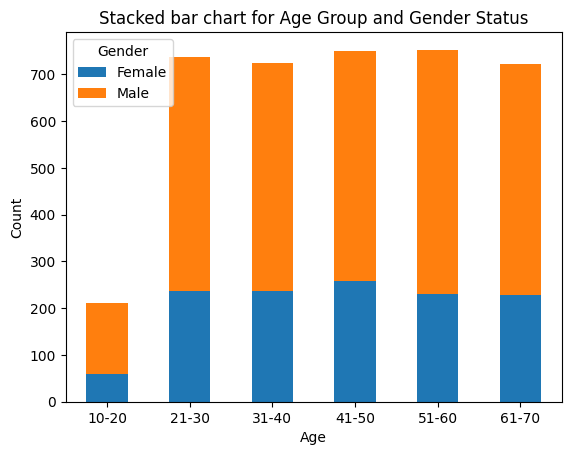

In [8]:
bins = [10, 20, 30, 40, 50, 60, 70]
age_group_names = ['10-20', '21-30', '31-40', '41-50', '51-60', '61-70']

df_age_gender = df[['Age', 'Gender']]
df_age_gender['age-binned'] = pd.cut(df_age_gender['Age'], bins, labels=age_group_names, include_lowest=True )

df_age_gender.groupby(['age-binned', 'Gender']).size().unstack().plot(kind='bar', stacked=True)
plt.xlabel('Age')
plt.ylabel("Count")
plt.title("Stacked bar chart for Age Group and Gender Status")
plt.xticks(rotation='horizontal')
plt.show()

Which items are most frequently purchased?

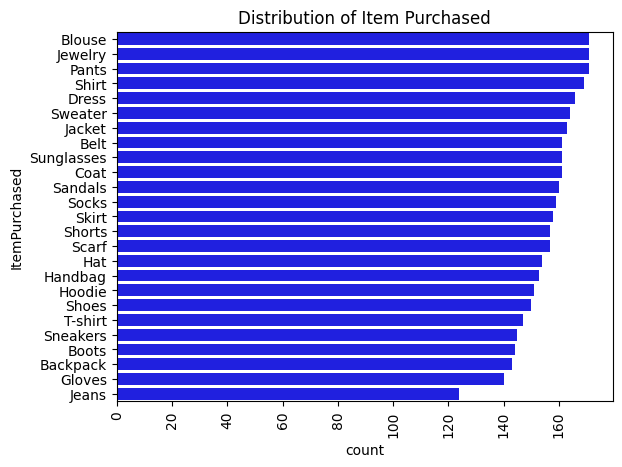

In [9]:
order = df['ItemPurchased'].value_counts(ascending=False).index

sns.countplot(y='ItemPurchased', data=df, color='b', order=order)
plt.title('Distribution of Item Purchased')
plt.xticks(rotation='vertical')
plt.show()


What are the top categories in terms of sales?

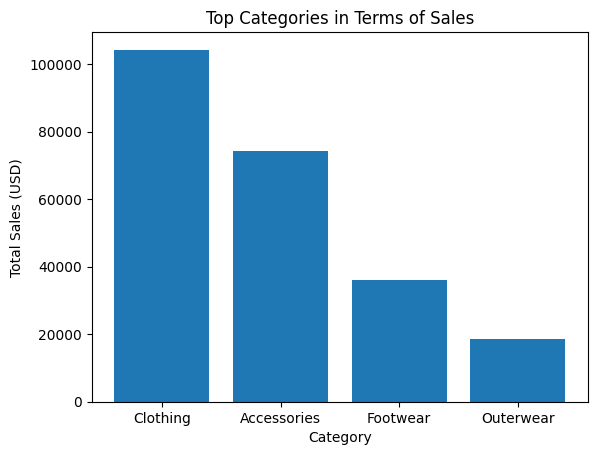

In [10]:
category_sales = df.groupby('Category')['PurchaseAmount'].sum().reset_index()

# Sort the data by sales in descending order to find the top categories
category_sales = category_sales.sort_values(by='PurchaseAmount', ascending=False)
plt.bar(category_sales['Category'], category_sales['PurchaseAmount'])
plt.xlabel('Category')
plt.ylabel('Total Sales (USD)')
plt.title('Top Categories in Terms of Sales')
plt.show()

Is there any significant difference between category and the review rating?

[Text(0.5, 1.0, 'Box plot of Category and Review Rating')]

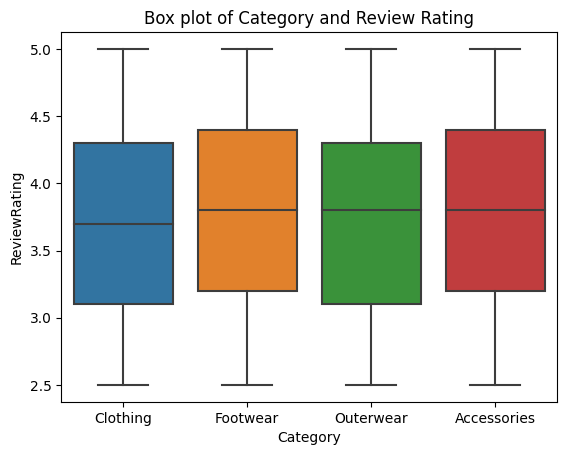

In [11]:
sns.boxplot(x='Category', y='ReviewRating', data=df).set(title='Box plot of Category and Review Rating')


Does the subscription status affect the frequency of purchase?

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Annually'),
  Text(1, 0, 'Bi-Weekly'),
  Text(2, 0, 'Every 3 Months'),
  Text(3, 0, 'Fortnightly'),
  Text(4, 0, 'Monthly'),
  Text(5, 0, 'Quarterly'),
  Text(6, 0, 'Weekly')])

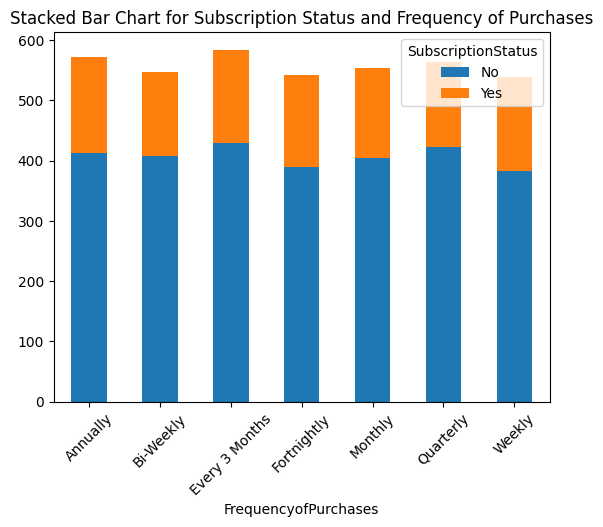

In [12]:
pd.crosstab(df['FrequencyofPurchases'], df['SubscriptionStatus']).plot(kind='bar', stacked=True, title='Stacked Bar Chart for Subscription Status and Frequency of Purchases', rot=0)
plt.xticks(rotation=45)

In [13]:
contigency_freSub= pd.crosstab(df['FrequencyofPurchases'], df['SubscriptionStatus'])
print(contigency_freSub, '\n')

#Chi-square test of independence.
c, p, dof, expected = chi2_contingency(contigency_freSub)
print("p_value: ",round(p,3))

SubscriptionStatus     No  Yes
FrequencyofPurchases          
Annually              412  160
Bi-Weekly             407  140
Every 3 Months        430  154
Fortnightly           389  153
Monthly               404  149
Quarterly             423  140
Weekly                382  157 

p_value:  0.691


$H_0$: subscription status and frequency of purchase are independent <br>
By performing chisquare test, the p-value obtained is 0.691 which is larger than 0.05, this means that we fail to reject $H_0$. Thus, subscription status and frequency of purchase are independent.

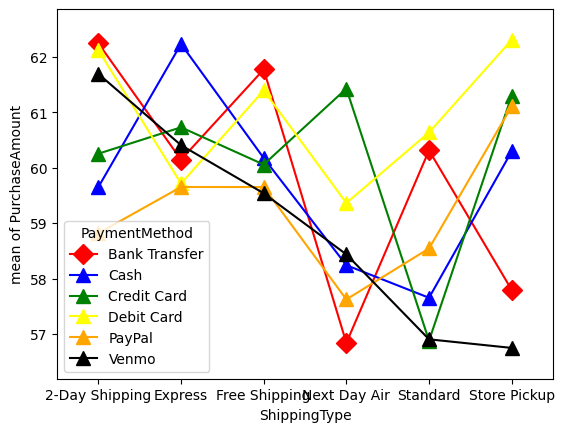

In [14]:
from statsmodels.graphics.factorplots import interaction_plot
fig = interaction_plot(df['ShippingType'], df['PaymentMethod'], df['PurchaseAmount'], colors=['red','blue','green','yellow','orange','black'], markers=['D','^','^','^','^','^'], ms=10)

In [15]:
df1 = df[['PurchaseAmount', 'ShippingType', 'PaymentMethod']]

model = ols('PurchaseAmount ~ C(ShippingType) + C(PaymentMethod) + C(ShippingType):C(PaymentMethod)',data=df1).fit()
sm.stats.anova_lm(model, typ=2)


,sum_sq,df,F,PR(>F)
C(ShippingType),3.237576e+03,5.0,1.149429,0.331817
C(PaymentMethod),1.599276e+03,5.0,0.567787,0.724791
C(ShippingType):C(PaymentMethod),5.847687e+03,25.0,0.415218,0.995438
Residual,2.176731e+06,3864.0,NaN,NaN


$H_0$: Shipping Type and Payment Status influence the Purchase Amount <br>
From the two way anova test result, both of the p-values for Shipping Type and Payment Status are larger than 0.05, weighing 0.332 and 0.725 respectively. This shows that both Shipping Type and Payment Status do not a significant affect on Purchase Amount individually. The p-value for considering Shipping Type and Payment Status is 0.995 which is larger than 0.05. From that, we can conclude that we fail to reject $H_0$. Shipping Type and Payment Status together do not influence the Purchase Amount.

In [16]:
print(df['DiscountApplied'].value_counts())
print(df['PromoCodeUsed'].value_counts())


No     2223
Yes    1677
Name: DiscountApplied, dtype: int64
No     2223
Yes    1677
Name: PromoCodeUsed, dtype: int64


We can conclude that the discount and promo column are the same, if a promo code is used then discount is applied and vv. So there is no need to find out how both of these attributes affecting the others.

What are the seasonal trends?

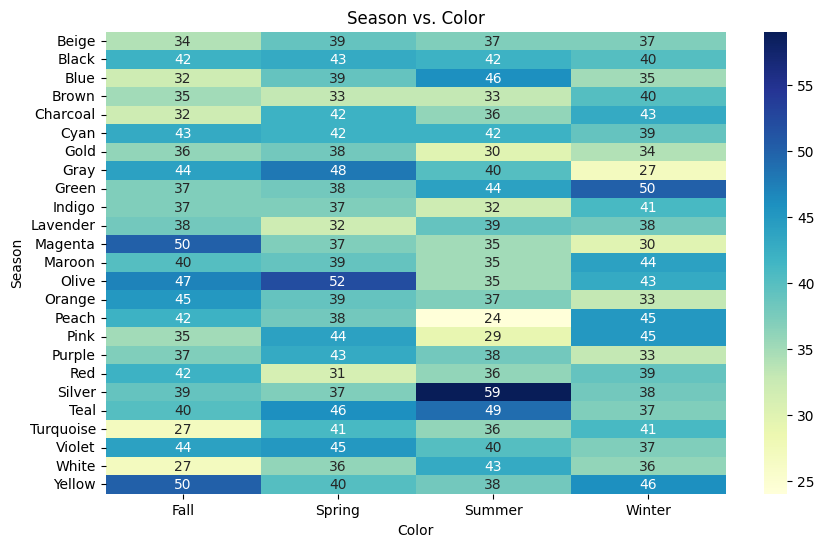

p_value:  0.719


In [17]:
contingency_colorSeason = pd.crosstab(df['Color'], df['Season'])
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_colorSeason, cmap="YlGnBu", annot=True, fmt='d')
plt.xlabel('Color')
plt.ylabel('Season')
plt.title('Season vs. Color')
plt.show()

#Chi-square test of independence.
c, p, dof, expected = chi2_contingency(contingency_colorSeason)
print("p_value: ",round(p,3))

$H_0$: Season and Color are independent <br>
By performing chisquare test, the p-value obtained is 0.719 which is larger than 0.05, this means that we fail to reject $H_0$. Thus, Color and Season are independent.

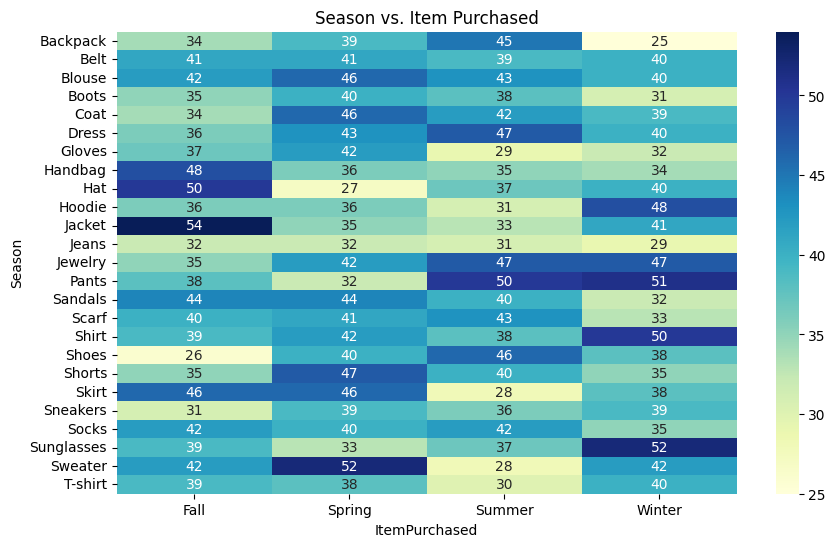

p_value:  0.289


In [18]:
contingency_itemSeason = pd.crosstab(df['ItemPurchased'], df['Season'])
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_itemSeason, cmap="YlGnBu", annot=True, fmt='d')
plt.xlabel('ItemPurchased')
plt.ylabel('Season')
plt.title('Season vs. Item Purchased')
plt.show()

#Chi-square test of independence.
c, p, dof, expected = chi2_contingency(contingency_itemSeason)
print("p_value: ",round(p,3))

$H_0$: Season and Item Purchased are independent <br>
By performing chisquare test, the p-value obtained is 0.289 which is larger than 0.05, this means that we fail to reject $H_0$. Thus, Item Purchased and Season are independent.

Is there any trends based on gender?

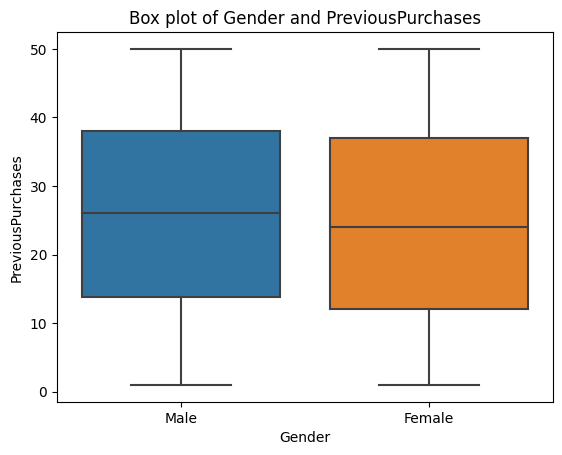

In [19]:
sns.boxplot(x='Gender', y='PreviousPurchases', data=df).set(title='Box plot of Gender and PreviousPurchases')
plt.show()

In [20]:
from scipy.stats import ttest_ind
t_stat, p = ttest_ind(df.query('Gender=="Male"')['PreviousPurchases'], df.query('Gender=="Female"')['PreviousPurchases'])

print("p_value: ", round(p,3))

p_value:  0.025


$H_0$: There is no significant difference between Gender and PreviousPurchases. <br>
After performing t-test the p-value obtained is 0.025 which is smaller than 0.05. Therefore, we reject $H_0$. There is a significant difference between Gender and PreviousPurchases.

In [26]:
contigency= pd.crosstab(df['Gender'], df['DiscountApplied'])
print(contigency, '\n')

#Chi-square test of independence.
c, p, dof, expected = chi2_contingency(contigency)
print("p_value: ",round(p,3))

DiscountApplied    No   Yes
Gender                     
Female           1248     0
Male              975  1677 

p_value:  0.0


#### $H_0$: Gender and DiscountApplied are independent
##### By performing chisquare test, the p-value obtained is 0.0 which is smaller than 0.05, this means that we reject $H_0$. Thus, Gender and DiscountApplied are independent.

# Does customers' demographic/geographic impact the Purchase Amount (USD)?

We will answer this question using Linear Regression

In [27]:
df_temp = df.copy()
df_temp.head()

,CustomerID,Age,Gender,ItemPurchased,Category,PurchaseAmount,Location,Size,Color,Season,ReviewRating,SubscriptionStatus,ShippingType,DiscountApplied,PromoCodeUsed,PreviousPurchases,PaymentMethod,FrequencyofPurchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [28]:
col_list = [col for col in df_temp.columns.tolist() if df_temp[col].dtype.name == "object"]
df_lr = df_temp[col_list]
df_temp = df_temp.drop(col_list, 1)
df_lr = df_lr.apply(LabelEncoder().fit_transform)
df_lr = pd.concat([df_temp, df_lr], axis = 1)

<ipython-input-28-879a8211b457>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_temp = df_temp.drop(col_list, 1)


In [29]:
df_lr = df_lr[['Age', 'Gender', 'Location', 'PurchaseAmount']]
df_lr

,Age,Gender,Location,PurchaseAmount
0,55,1,16,53
1,19,1,18,64
2,50,1,20,73
3,21,1,38,90
4,45,1,36,49
...,...,...,...,...
3895,40,0,45,28
3896,52,0,14,49
3897,46,0,29,33
3898,44,0,22,77


Now, we assign the x and y

In [30]:
y = df_lr.PurchaseAmount
X = df_lr.drop("PurchaseAmount", 1)

<ipython-input-30-2416640c2990>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df_lr.drop("PurchaseAmount", 1)


Select features using correlation

In [31]:
print(X.corr())

               Age    Gender  Location
Age       1.000000  0.002763 -0.001957
Gender    0.002763  1.000000  0.000747
Location -0.001957  0.000747  1.000000


Since the correlation are very low between these attributes, so we would have to select all as our features

Model implementation

In [32]:
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         PurchaseAmount   R-squared (uncentered):                   0.804
Model:                            OLS   Adj. R-squared (uncentered):              0.804
Method:                 Least Squares   F-statistic:                              5337.
Date:                Wed, 01 Nov 2023   Prob (F-statistic):                        0.00
Time:                        09:39:17   Log-Likelihood:                         -18591.
No. Observations:                3900   AIC:                                  3.719e+04
Df Residuals:                    3897   BIC:                                  3.721e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age            0.7764      0.019     40.167      0.000       0.739       0.814
Gender        12.2014      0.903     13.517      0.000      10.432      13.971
Location       0.5396      0.028     18.991      0.000       0.484       0.595
==============================================================================
Omnibus:                      153.418   Durbin-Watson:                   1.803
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.884
Skew:                           0.012   Prob(JB):                     3.00e-15
Kurtosis:                       2.359   Cond. No.                         104.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# What factors impact Frequency of Purchases?

In [79]:
df_temp = df.copy()
df_temp

,CustomerID,Age,Gender,ItemPurchased,Category,PurchaseAmount,Location,Size,Color,Season,ReviewRating,SubscriptionStatus,ShippingType,DiscountApplied,PromoCodeUsed,PreviousPurchases,PaymentMethod,FrequencyofPurchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


In [80]:
col_list = [col for col in df_temp.columns.tolist() if df_temp[col].dtype.name == "object"]
df_le = df_temp[col_list]
df_temp = df_temp.drop(col_list, 1)
df_le = df_le.apply(LabelEncoder().fit_transform)
df_le

<ipython-input-80-adfc0a28cd30>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_temp = df_temp.drop(col_list, 1)


,Gender,ItemPurchased,Category,Location,Size,Color,Season,SubscriptionStatus,ShippingType,DiscountApplied,PromoCodeUsed,PaymentMethod,FrequencyofPurchases
0,1,2,1,16,0,7,3,1,1,1,1,5,3
1,1,23,1,18,0,12,3,1,1,1,1,1,3
2,1,11,1,20,2,12,1,1,2,1,1,2,6
3,1,14,2,38,1,12,1,1,3,1,1,4,6
4,1,2,1,36,1,21,1,1,2,1,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,0,9,1,45,0,21,2,0,0,0,0,5,6
3896,0,0,0,14,0,23,1,0,5,0,0,0,1
3897,0,1,0,29,0,8,1,0,4,0,0,5,5
3898,0,17,2,22,2,3,2,0,1,0,0,5,6


In [81]:
df_temp = pd.concat([df_temp, df_le], axis = 1)
df_temp

,CustomerID,Age,PurchaseAmount,ReviewRating,PreviousPurchases,Gender,ItemPurchased,Category,Location,Size,Color,Season,SubscriptionStatus,ShippingType,DiscountApplied,PromoCodeUsed,PaymentMethod,FrequencyofPurchases
0,1,55,53,3.1,14,1,2,1,16,0,7,3,1,1,1,1,5,3
1,2,19,64,3.1,2,1,23,1,18,0,12,3,1,1,1,1,1,3
2,3,50,73,3.1,23,1,11,1,20,2,12,1,1,2,1,1,2,6
3,4,21,90,3.5,49,1,14,2,38,1,12,1,1,3,1,1,4,6
4,5,45,49,2.7,31,1,2,1,36,1,21,1,1,2,1,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,28,4.2,32,0,9,1,45,0,21,2,0,0,0,0,5,6
3896,3897,52,49,4.5,41,0,0,0,14,0,23,1,0,5,0,0,0,1
3897,3898,46,33,2.9,24,0,1,0,29,0,8,1,0,4,0,0,5,5
3898,3899,44,77,3.8,24,0,17,2,22,2,3,2,0,1,0,0,5,6


Feature Selection Using BorutaPy

In [51]:
!pip install boruta

In [82]:
y = df_temp.FrequencyofPurchases
X = df_temp.drop("FrequencyofPurchases", 1)
colnames = X.columns

rf = RandomForestClassifier(n_jobs = -1, class_weight = "balanced", max_depth = 5)
feat_selector = BorutaPy(rf, n_estimators="auto", random_state=1)
feat_selector.fit(X.values, y.values.ravel())

<ipython-input-82-1d0b5a2994a8>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df_temp.drop("FrequencyofPurchases", 1)


BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                          n_estimators=28, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x7877E2ED6840),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7877E2ED6840)

In [83]:
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

boruta_score = ranking(list(map(float, feat_selector.ranking_)), colnames, order=-1)
boruta_score = pd.DataFrame(list(boruta_score.items()), columns=['Features', 'Score'])
boruta_score = boruta_score.sort_values("Score", ascending = False)

print('---------Top 10----------')
display(boruta_score.head(10))

print('---------Bottom 10----------')
boruta_score.tail(10)

---------Top 10----------


,Features,Score
0,CustomerID,1.00
4,PreviousPurchases,0.94
1,Age,0.94
2,PurchaseAmount,0.81
8,Location,0.75
6,ItemPurchased,0.69
10,Color,0.62
3,ReviewRating,0.56
16,PaymentMethod,0.50
13,ShippingType,0.44


---------Bottom 10----------


,Features,Score
3,ReviewRating,0.56
16,PaymentMethod,0.50
13,ShippingType,0.44
9,Size,0.38
7,Category,0.31
11,Season,0.25
5,Gender,0.19
14,DiscountApplied,0.12
12,SubscriptionStatus,0.06
15,PromoCodeUsed,0.00


In [84]:
#testing how many features is best on NB
for i in range (1,11):
    y = df_temp.FrequencyofPurchases
    X = df_temp.drop('FrequencyofPurchases', 1)
    cols = boruta_score.Features[0:i]
    X = X[cols].copy()

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=5)
    nb = GaussianNB()
    nb.fit(X_train, y_train)
    y_pred = nb.predict(X_test)
    print('Accuracy ', i, ': ', nb.score(X_test, y_test))

<ipython-input-84-8db702f11dc8>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df_temp.drop('FrequencyofPurchases', 1)
<ipython-input-84-8db702f11dc8>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df_temp.drop('FrequencyofPurchases', 1)
<ipython-input-84-8db702f11dc8>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df_temp.drop('FrequencyofPurchases', 1)
<ipython-input-84-8db702f11dc8>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df_temp.drop('FrequencyofPurchases', 1)
<ipython-input-84-8db702f11dc8>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' wil

Accuracy  1 :  0.13397435897435897
Accuracy  2 :  0.14487179487179488
Accuracy  3 :  0.14487179487179488
Accuracy  4 :  0.1467948717948718
Accuracy  5 :  0.14551282051282052
Accuracy  6 :  0.13846153846153847
Accuracy  7 :  0.14166666666666666
Accuracy  8 :  0.14358974358974358
Accuracy  9 :  0.13974358974358975
Accuracy  10 :  0.13397435897435897


<ipython-input-84-8db702f11dc8>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df_temp.drop('FrequencyofPurchases', 1)


Noticed the accuracy is very low, which might be caused by the multi class with 7 values (as shown below in the code), so lets simplify it a bit to lesser classes (3)

In [86]:
df_temp['FrequencyofPurchases'].value_counts()

2    584
0    572
5    563
4    553
1    547
3    542
6    539
Name: FrequencyofPurchases, dtype: int64

In [87]:
df['FrequencyofPurchases'].value_counts()


Every 3 Months    584
Annually          572
Quarterly         563
Monthly           553
Bi-Weekly         547
Fortnightly       542
Weekly            539
Name: FrequencyofPurchases, dtype: int64

Now we will rerun the code again, steps are same as above

In [96]:
df_temp = df.copy()
df_temp

,CustomerID,Age,Gender,ItemPurchased,Category,PurchaseAmount,Location,Size,Color,Season,ReviewRating,SubscriptionStatus,ShippingType,DiscountApplied,PromoCodeUsed,PreviousPurchases,PaymentMethod,FrequencyofPurchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


In [97]:
col_list = [col for col in df_temp.columns.tolist() if df_temp[col].dtype.name == "object"]
df_le = df_temp[col_list]
df_temp = df_temp.drop(col_list, 1)
df_le = df_le.apply(LabelEncoder().fit_transform)
df_le

<ipython-input-97-adfc0a28cd30>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_temp = df_temp.drop(col_list, 1)


,Gender,ItemPurchased,Category,Location,Size,Color,Season,SubscriptionStatus,ShippingType,DiscountApplied,PromoCodeUsed,PaymentMethod,FrequencyofPurchases
0,1,2,1,16,0,7,3,1,1,1,1,5,3
1,1,23,1,18,0,12,3,1,1,1,1,1,3
2,1,11,1,20,2,12,1,1,2,1,1,2,6
3,1,14,2,38,1,12,1,1,3,1,1,4,6
4,1,2,1,36,1,21,1,1,2,1,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,0,9,1,45,0,21,2,0,0,0,0,5,6
3896,0,0,0,14,0,23,1,0,5,0,0,0,1
3897,0,1,0,29,0,8,1,0,4,0,0,5,5
3898,0,17,2,22,2,3,2,0,1,0,0,5,6


In [98]:
df_temp = pd.concat([df_temp, df_le], axis = 1)
df_temp

,CustomerID,Age,PurchaseAmount,ReviewRating,PreviousPurchases,Gender,ItemPurchased,Category,Location,Size,Color,Season,SubscriptionStatus,ShippingType,DiscountApplied,PromoCodeUsed,PaymentMethod,FrequencyofPurchases
0,1,55,53,3.1,14,1,2,1,16,0,7,3,1,1,1,1,5,3
1,2,19,64,3.1,2,1,23,1,18,0,12,3,1,1,1,1,1,3
2,3,50,73,3.1,23,1,11,1,20,2,12,1,1,2,1,1,2,6
3,4,21,90,3.5,49,1,14,2,38,1,12,1,1,3,1,1,4,6
4,5,45,49,2.7,31,1,2,1,36,1,21,1,1,2,1,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,28,4.2,32,0,9,1,45,0,21,2,0,0,0,0,5,6
3896,3897,52,49,4.5,41,0,0,0,14,0,23,1,0,5,0,0,0,1
3897,3898,46,33,2.9,24,0,1,0,29,0,8,1,0,4,0,0,5,5
3898,3899,44,77,3.8,24,0,17,2,22,2,3,2,0,1,0,0,5,6


** Here, we make the class from 7 to 3 only.

In [99]:
df_temp.loc[df_temp['FrequencyofPurchases'] == 2, 'FrequencyofPurchases'] = 4
df_temp.loc[df_temp['FrequencyofPurchases'] == 5, 'FrequencyofPurchases'] = 4
df_temp.loc[df_temp['FrequencyofPurchases'] == 1, 'FrequencyofPurchases'] = 6
df_temp.loc[df_temp['FrequencyofPurchases'] == 3, 'FrequencyofPurchases'] = 6

df_temp['FrequencyofPurchases'].value_counts()

4    1700
6    1628
0     572
Name: FrequencyofPurchases, dtype: int64

In [100]:
y = df_temp.FrequencyofPurchases
X = df_temp.drop("FrequencyofPurchases", 1)
colnames = X.columns

rf = RandomForestClassifier(n_jobs = -1, class_weight = "balanced", max_depth = 5)
feat_selector = BorutaPy(rf, n_estimators="auto", random_state=1)
feat_selector.fit(X.values, y.values.ravel())

<ipython-input-100-1d0b5a2994a8>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df_temp.drop("FrequencyofPurchases", 1)


BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                          n_estimators=28, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x7877E2ED6D40),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7877E2ED6D40)

In [101]:
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

boruta_score = ranking(list(map(float, feat_selector.ranking_)), colnames, order=-1)
boruta_score = pd.DataFrame(list(boruta_score.items()), columns=['Features', 'Score'])
boruta_score = boruta_score.sort_values("Score", ascending = False)

print('---------Top 10----------')
display(boruta_score.head(10))

print('---------Bottom 10----------')
boruta_score.tail(10)

---------Top 10----------


,Features,Score
0,CustomerID,1.00
1,Age,0.94
4,PreviousPurchases,0.88
8,Location,0.81
2,PurchaseAmount,0.81
3,ReviewRating,0.69
10,Color,0.69
6,ItemPurchased,0.56
16,PaymentMethod,0.50
13,ShippingType,0.44


---------Bottom 10----------


,Features,Score
6,ItemPurchased,0.56
16,PaymentMethod,0.50
13,ShippingType,0.44
11,Season,0.38
9,Size,0.31
7,Category,0.25
5,Gender,0.19
12,SubscriptionStatus,0.12
15,PromoCodeUsed,0.06
14,DiscountApplied,0.00


In [102]:
#testing how many features is best on NB
for i in range (1,11):
    y = df_temp.FrequencyofPurchases
    X = df_temp.drop('FrequencyofPurchases', 1)
    cols = boruta_score.Features[0:i]
    X = X[cols].copy()

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=5)
    nb = GaussianNB()
    nb.fit(X_train, y_train)
    y_pred = nb.predict(X_test)
    print('Accuracy ', i, ': ', nb.score(X_test, y_test))

Accuracy  1 :  0.4108974358974359
Accuracy  2 :  0.4064102564102564
Accuracy  3 :  0.4153846153846154
Accuracy  4 :  0.40576923076923077
Accuracy  5 :  0.3967948717948718
Accuracy  6 :  0.4
Accuracy  7 :  0.40384615384615385
Accuracy  8 :  0.4115384615384615
Accuracy  9 :  0.4115384615384615
Accuracy  10 :  0.4128205128205128


<ipython-input-102-8db702f11dc8>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df_temp.drop('FrequencyofPurchases', 1)
<ipython-input-102-8db702f11dc8>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df_temp.drop('FrequencyofPurchases', 1)
<ipython-input-102-8db702f11dc8>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df_temp.drop('FrequencyofPurchases', 1)
<ipython-input-102-8db702f11dc8>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df_temp.drop('FrequencyofPurchases', 1)
<ipython-input-102-8db702f11dc8>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels

we will use the top 3 features which has the highest accuracy

In [103]:
y = df_temp.FrequencyofPurchases
X = df_temp.drop("FrequencyofPurchases", 1)

cols = boruta_score.Features[0:3]
X = X[cols].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=5)
lr = LogisticRegression(multi_class='multinomial')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

prob_LR = lr.predict_proba(X_test)
prob_LR = prob_LR[:, 1]

Accuracy Score: 0.4076923076923077
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       238
           4       0.44      0.39      0.42       708
           6       0.38      0.58      0.46       614

    accuracy                           0.41      1560
   macro avg       0.28      0.33      0.29      1560
weighted avg       0.35      0.41      0.37      1560



<ipython-input-103-d17150575eae>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df_temp.drop("FrequencyofPurchases", 1)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.

<Axes: >

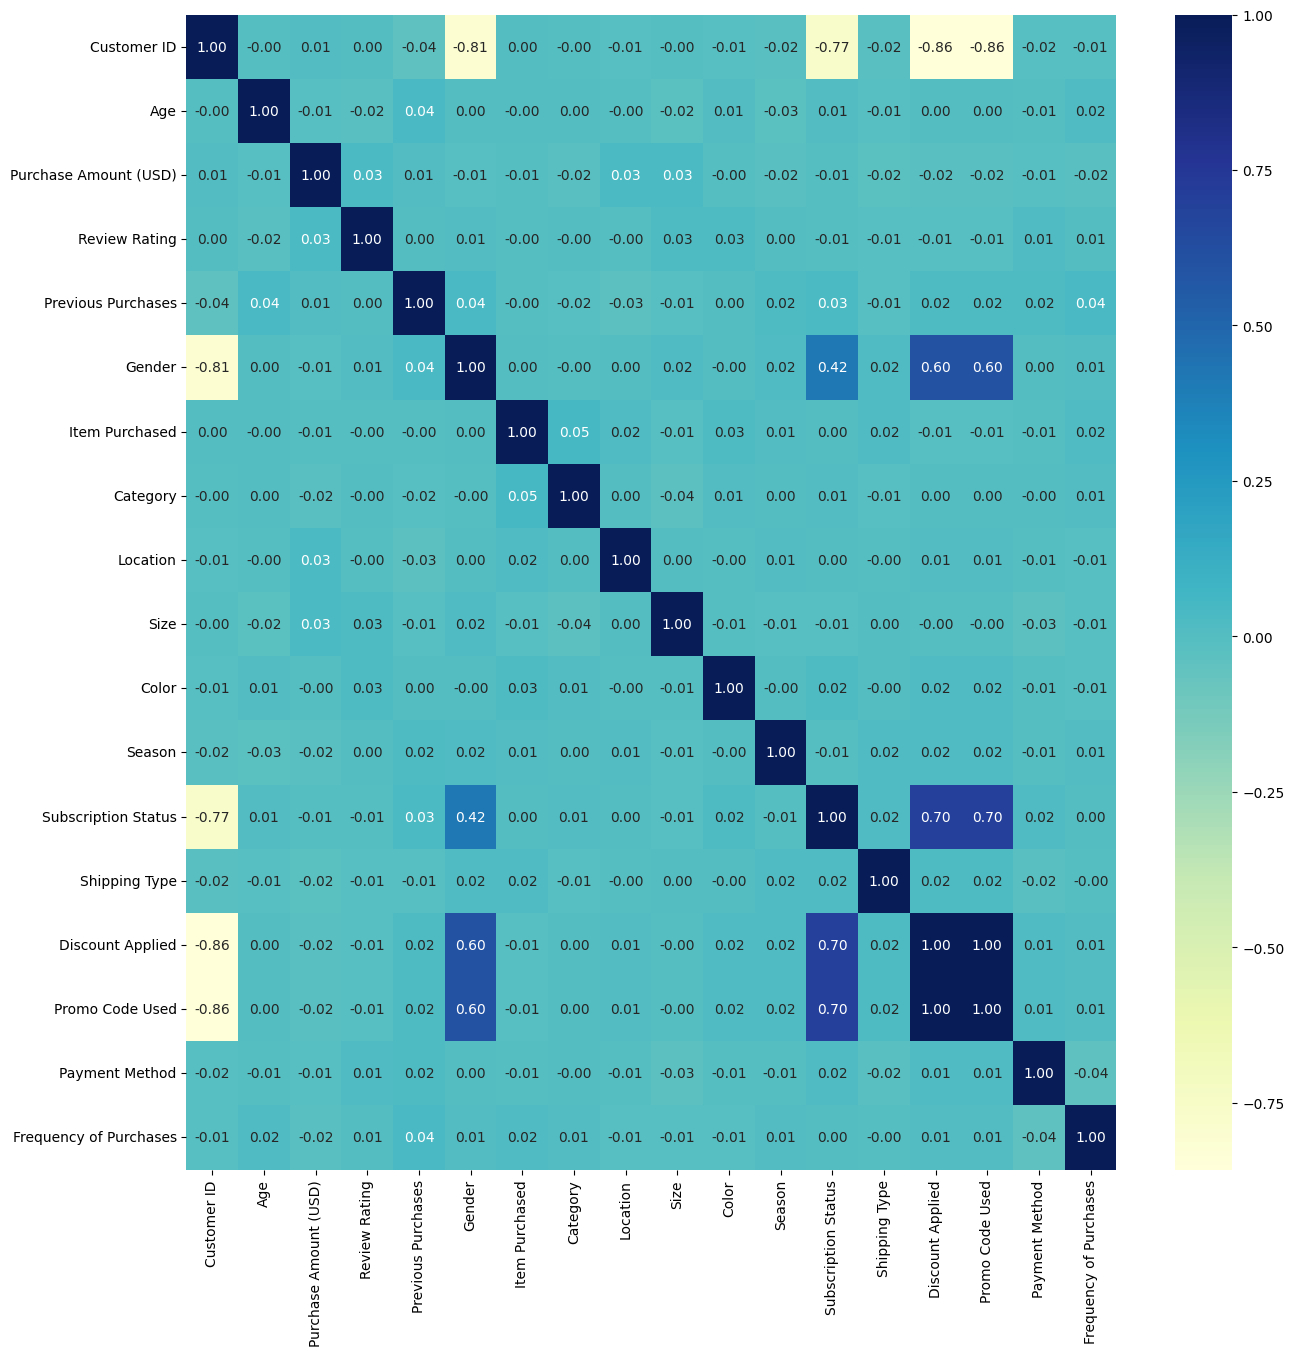

In [ ]:
#correation
corr = df.corr()

plt.figure(figsize=(15,15))
#sns.heatmap(corr , vmax=.8, square=True, annot=True, fmt= '.2f', annot_kws={'size': 1}, cmap=sns.color_palette("Blues"))
sns.heatmap(corr, cmap="YlGnBu", annot=True, fmt= '.2f')